### Team members: Taleen Barakeh, Riley Nickel and Lior Ben David

# 1. Data Source and Content

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# access to data file
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [ ]:
# display top 5 rows to understand structure
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
# separating the flag column to create train dataset and test dataset
train_df = df[df['flag'] == 'train']
test_df = df[df['flag'] == 'test']

In [ ]:
# clean the datasets from the "flag" column
train_df = train_df.drop(columns=['flag'])
test_df = test_df.drop(columns=['flag'])

In [ ]:
feature_columns = ['hours_per_week_bin', 'occupation_bin',	'msr_bin',	'capital_gl_bin',	'race_sex_bin',	'education_num_bin', 'education_bin',	'workclass_bin',	'age_bin']
target_column = 'y'

In [ ]:
# Build the feature matrices and target arrays for train and test datasets
X_train = train_df[feature_columns]
y_train = train_df[target_column]

X_test = test_df[feature_columns]
y_test = test_df[target_column]
X_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100


In [ ]:
# import library to help encode the categorical columns to numerical to prepare the data
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns and their unique values
categorical_columns = {
    'hours_per_week_bin': ['b. 31-40', 'a. 0-30', 'd. 41-50 & 61-70', 'c. 71-100', 'e. 51-60'],
    'occupation_bin': ['b. Mid - Low', 'e. High', 'a. Low', 'c. Mid - Mid', 'd. Mid - High'],
    'msr_bin': ['b. Mid', 'c. High', 'a. Low'],
    'capital_gl_bin': ['c. > 0', 'a. = 0', 'b. < 0'],
    'race_sex_bin': ['c. High', 'b. Mid', 'a. Low'],
    'education_num_bin': ['c. 13', 'b. 9-12', 'a. 0-8', 'd. 14', 'e. 15+'],
    'education_bin': ['c. Bachelors', 'b. Mid', 'a. Low', 'd. Masters', 'e. High'],
    'workclass_bin': ['b. income', 'a. no income'],
    'age_bin': ['d. 36-40 & 56-60', 'e. 40-55', 'b. 26-30 & 71-100', 'c. 31-35 & 61-70', 'a. 0-25']
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# for X_train
# Iterate over all categorical columns and transform them into numerical columns
for col, values in categorical_columns.items():
    label_encoder.fit(values)
    X_train[col] = label_encoder.transform(X_train[col])

X_train.head()

<ipython-input-8-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = label_encoder.transform(X_train[col])
<ipython-input-8-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = label_encoder.transform(X_train[col])
<ipython-input-8-529698dbee24>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,1,1,1,2,2,2,2,1,3
1,0,4,2,0,2,2,2,1,4
2,1,0,1,0,2,1,1,1,3
3,1,0,2,0,1,0,0,1,4
4,1,4,2,0,0,2,2,1,1


In [ ]:
# for X-test
# Iterate over all categorical columns and transform them into numerical columns
for col, values in categorical_columns.items():
    label_encoder.fit(values)
    X_test[col] = label_encoder.transform(X_test[col])

X_test.head()

<ipython-input-9-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoder.transform(X_test[col])
<ipython-input-9-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoder.transform(X_test[col])
<ipython-input-9-e6ca0caf0e02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,1,1,0,0,1,0,0,1,0
32562,3,1,2,0,2,1,1,1,3
32563,1,3,2,0,2,1,1,1,1
32564,1,1,2,2,1,1,1,1,4
32565,0,1,0,0,1,1,1,0,0


# 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter

Example given by the professor:

In [ ]:
# import important library for the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

<Axes: >

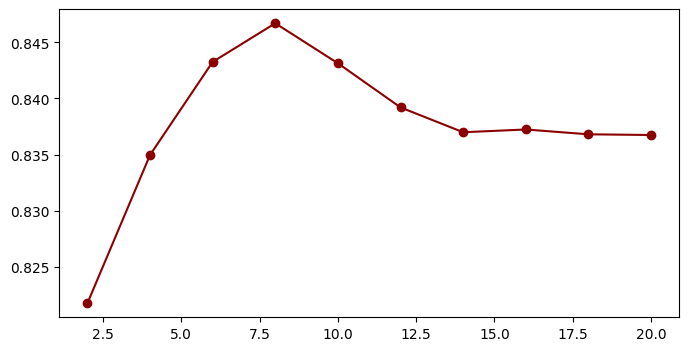

In [ ]:
results= []
max_depth_options= [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

# 3. Building a Random Forest Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# range of n_estimator values we will compare
n_estimators_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [ ]:
accuracy_scores = []
auc_scores = []

In [ ]:
# Train RandomForestClassifier for each value of n_estimator values and evaluate performance
for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Perform cross-validation and compute accuracy and AUC scores
    accuracy = np.mean(cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy'))
    auc = np.mean(cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='roc_auc'))
    # Append scores to lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

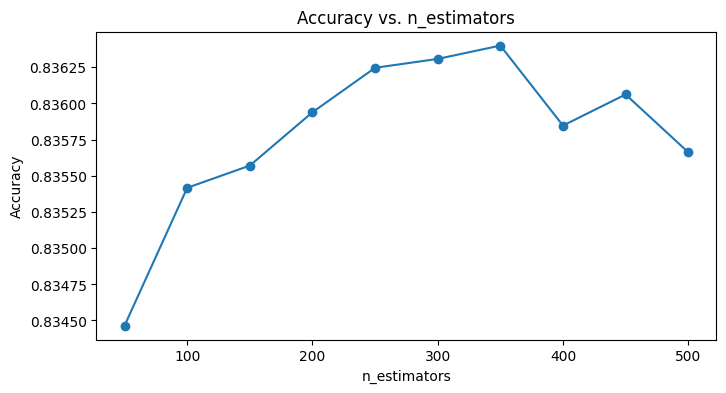

In [ ]:
# line graph for accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

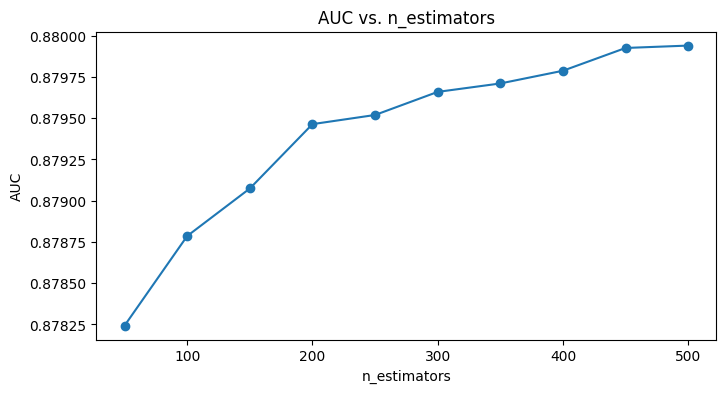

In [ ]:
# line graph for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, auc_scores, marker='o')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

###Q1. Write your observations about the Classifier’s behavior with respect to the numberc of estimators
The accuracy of the Random Forest classifier generally increases as the number of estimators increases up to around 350. After that, it varies a little before showing a minor reduction, which could be the result of overfitting.
The AUC score is also increasing as the number of estimators is also increasing, showing an improved class discrimination by the model. The AUC score's growth slows down, suggesting that further increases in the number of estimators offer declining returns.

###Q2. Is there an optimal value of the estimator within the given range?
Within the specified range, it seems that 350 is the ideal number of estimators for accuracy, as this is the point at which accuracy peaks before it begins to drop.
The curve for AUC keeps rising even at 500 estimators, suggesting that the ideal number may not have been found within the range that was investigated. It might be advisable to select a number of estimators where the AUC gain starts to level away which may be between 350 and 500 based on the supplied graphs, given the efficiency and potential overfitting.

# 4. Building AdaBoost, Gradient Boost, and XGB

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
accuracy_scores1 = []
auc_scores1 = []

In [ ]:
# Train AdaBoostClassifier for each value of n_estimators and evaluate performance
for n_estimators in n_estimators_values:
    ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    # Perform cross-validation and compute accuracy and AUC scores
    accuracy = np.mean(cross_val_score(ada_classifier, X_train, y_train, cv=5, scoring='accuracy'))
    auc = np.mean(cross_val_score(ada_classifier, X_train, y_train, cv=5, scoring='roc_auc'))
    # Append scores to lists
    accuracy_scores1.append(accuracy)
    auc_scores1.append(auc)

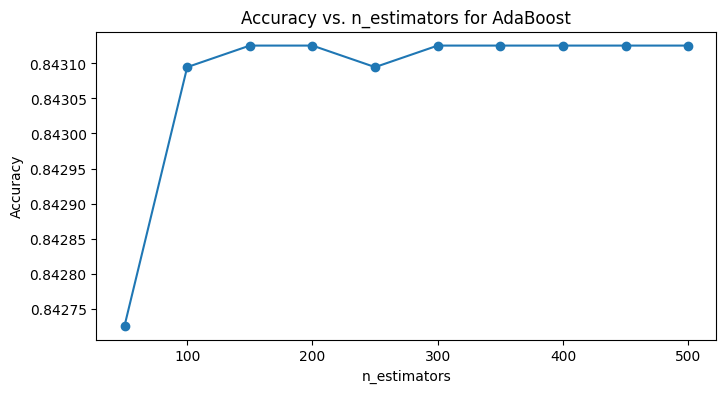

In [ ]:
# line graph for Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, accuracy_scores1, marker='o')
plt.title('Accuracy vs. n_estimators for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

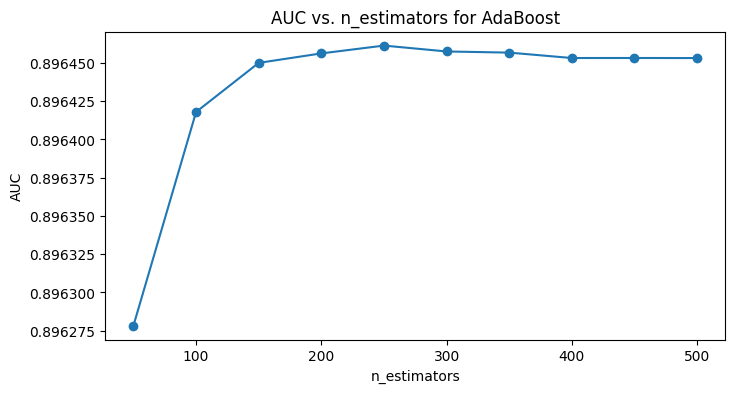

In [ ]:
# line graph for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, auc_scores1, marker='o')
plt.title('AUC vs. n_estimators for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

###Q3. Write your observations about the Classifier’s behavior with respect to the numberc of estimators
Accuracy: When there are between 50 and 100 estimators, the accuracy increases dramatically. The accuracy improvement is negligible and effectively levels after 100 estimators. There is a little decline after 300 estimators, indicating that more estimators added after this point may cause overfitting rather than increase accuracy.
AUC: Similar to accuracy, there is a noticeable improvement in the AUC score up to 100 estimators. The AUC score doesn't drop after that, but it appears to stabilize. This suggests that while adding additional estimators initially increases the classifier's capacity to distinguish between classes, the benefit of doing so decreases as the number of estimators increases.

###Q4. Is there an optimal value of the estimator within the given range?
Accuracy: It seems that about 100 is the ideal number of estimators, after which accuracy increases to a plateau. Since there is no discernible increase in accuracy, selecting a figure much higher than 100 could not be computationally efficient.
AUC: Since the AUC score begins to flatten out after this point, suggesting that more estimators do not significantly increase the model's discriminatory power, the ideal number of estimators for AUC likewise appears to be approximately 100.

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
accuracy_scores2 = []
auc_scores2 = []

In [ ]:
# Train GradientBoostingClassifier for each value of n_estimators and evaluate performance
for n_estimators in n_estimators_values:
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    # Perform cross-validation and compute accuracy and AUC scores
    accuracy = np.mean(cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy'))
    auc = np.mean(cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='roc_auc'))
    # Append scores to lists
    accuracy_scores2.append(accuracy)
    auc_scores2.append(auc)

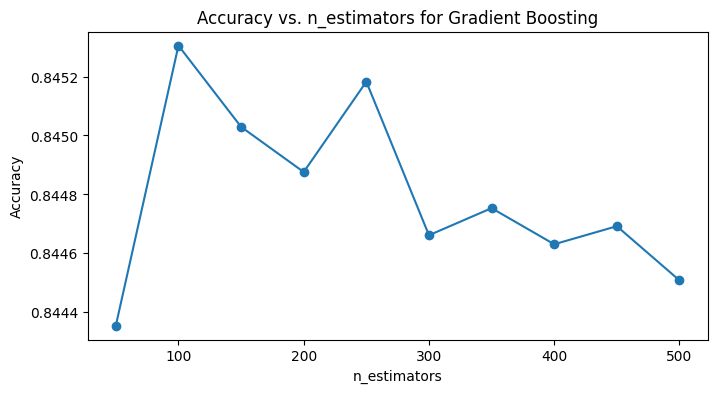

In [ ]:
# line graph for Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, accuracy_scores2, marker='o')
plt.title('Accuracy vs. n_estimators for Gradient Boosting')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

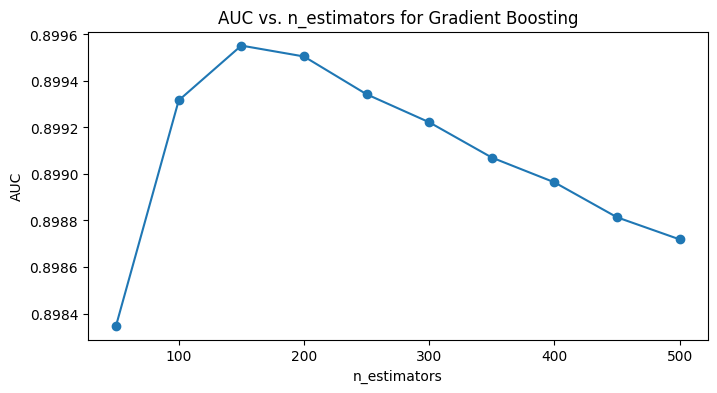

In [ ]:
# line graph for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, auc_scores2, marker='o')
plt.title('AUC vs. n_estimators for Gradient Boosting')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

###Q5. Write your observations about the Classifier’s behavior with respect to the numberc of estimators
There is a steep increase in the accuracy of the model from 50 to 100 estimators. However, after that 100 estimator point the accuracy started to decrease, with a slight uptick at 250 estimators but not reaching the 100 estimator level. The AUC graph also has a steep increase from 50 to 100 estimators then it steadily decreases after the 150 estimator mark.

###Q6. Is there an optimal value of the estimator within the given range?
There appears to be an optimal value around 100 to 150 estimators. 150 estimators resulted in the highest AUC while 100 estimators gave us the highest accuracy.

##XGB

In [ ]:
import xgboost as xgb

In [ ]:
accuracy_scores3 = []
auc_scores3 = []

In [ ]:
# Train XGBoost classifier for each value of n_estimators and evaluate performance
for n_estimators in n_estimators_values:
    xgb_classifier = xgb.XGBClassifier(n_estimators=n_estimators, random_state=42)
    # Perform cross-validation and compute accuracy and AUC scores
    accuracy = np.mean(cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy'))
    auc = np.mean(cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='roc_auc'))
    # Append scores to lists
    accuracy_scores3.append(accuracy)
    auc_scores3.append(auc)

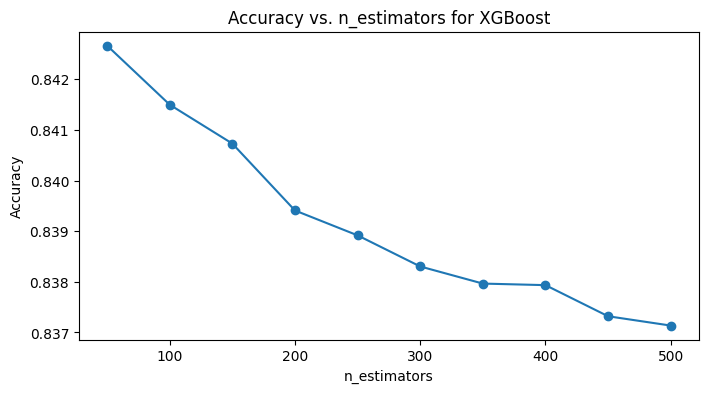

In [ ]:
# line graph for Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, accuracy_scores3, marker='o')
plt.title('Accuracy vs. n_estimators for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

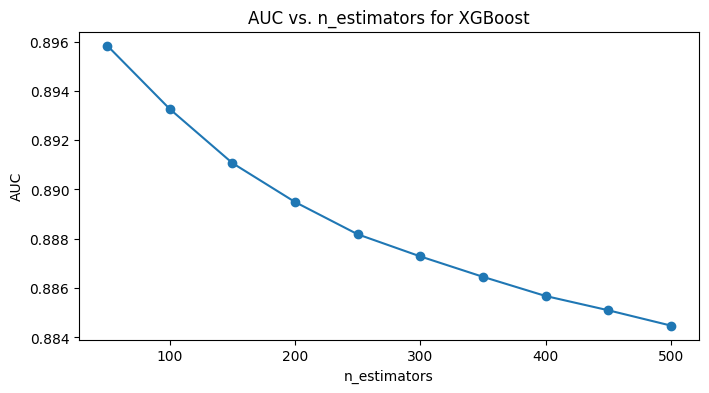

In [ ]:
# line graph for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_values, auc_scores3, marker='o')
plt.title('AUC vs. n_estimators for XGBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

###Q7. Write your observations about the Classifier’s behavior with respect to the numberc of estimators
In both the AUC and Accuracy chart there is a steady downward trend. As the number of estimators increases the accuracy and AUC of the model decrease.

###Q8. Is there an optimal value of the estimator within the given range?
50 is the optimal value number of estimators from the values we chose. However, the trend of both graphs suggests if we were to decrease the number of estimators below 50 we could achieve a higher accuracy and AUC score with the XGB model.

# 5. Compare Performance

For the best values of Accuracy and AUC for four models:

In [ ]:
print("Best AUC")
print("Random Forest: ",max(auc_scores))
print("AdaBoost: ",max(auc_scores1))
print("Gradient Boost: ",max(auc_scores2))
print("XGB: ",max(auc_scores3))

Best AUC
Random Forest:  0.8799399251770978
AdaBoost:  0.8964612479570622
Gradient Boost:  0.8995513134188142
XGB:  0.8958383504220884


In [ ]:
print("Best Accuracy")
print("Random Forest: ",max(accuracy_scores))
print("AdaBoost: ",max(accuracy_scores1))
print("Gradient Boost: ",max(accuracy_scores2))
print("XGB: ",max(accuracy_scores3))

Best Accuracy
Random Forest:  0.8363994275670923
AdaBoost:  0.8431253067480613
Gradient Boost:  0.845305660649972
XGB:  0.8426645574849168


In [ ]:
data = {
    'Random Forest': [f'{max(accuracy_scores):.2%}', f'{max(auc_scores):.2%}'],
    'AdaBoost': [f'{max(accuracy_scores1):.2%}', f'{max(auc_scores1):.2%}'],
    'Gradient Boost': [f'{max(accuracy_scores2):.2%}', f'{max(auc_scores2):.2%}'],
    'XGB': [f'{max(accuracy_scores3):.2%}', f'{max(auc_scores3):.2%}']
}
index = ['Accuracy', 'AUC']
df = pd.DataFrame(data, index=index)

df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,83.64%,84.31%,84.53%,84.27%
AUC,87.99%,89.65%,89.96%,89.58%


###Final Thoughs:
The best accuracy and best AUC scors are achieved using the Gradient Boost Classifier Ensemble Model, while Random Forest took the longest to run but also perform the worst out of these 4 models.